<a href="https://colab.research.google.com/github/Yiting916/data_analysis/blob/main/05-02.LAB_VideoGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-02.LAB_VideoGameSales_學號_姓名  (例: "05-02.LAB_VideoGameSales_00_陳仁政")
* 附件檔名請設定為： 05-02.LAB_VideoGameSales_學號_姓名.ipynb (例: "05-02.LAB_VideoGameSales_00_陳仁政.ipynb")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

<div><p>This dataset contains a list of video games with sales greater than 100,000 copies.  It was generated by a scrape of <a href="http://www.vgchartz.com/" target="_blank">vgchartz.com</a>.</p>
<p>Fields include</p>
<ul>
<li><p>Rank - Ranking of overall sales</p></li>
<li><p>Name - The games name</p></li>
<li><p>Platform - Platform of the games release (i.e. PC,PS4, etc.)</p></li>
<li><p>Year - Year of the game's release</p></li>
<li><p>Genre - Genre of the game</p></li>
<li><p>Publisher - Publisher of the game</p></li>
<li><p>NA_Sales - Sales in North America (in millions)</p></li>
<li><p>EU_Sales - Sales in Europe (in millions)</p></li>
<li><p>JP_Sales - Sales in Japan (in millions)</p></li>
<li><p>Other_Sales - Sales in the rest of the world (in millions)</p></li>
<li><p>Global_Sales - Total worldwide sales.</p></li>
</ul>
<p>The script to scrape the data is available at <a href="https://github.com/GregorUT/vgchartzScrape" target="_blank">https://github.com/GregorUT/vgchartzScrape</a>.<br>
It is based on BeautifulSoup using Python.<br>
There are 16,598 records.  2 records were dropped due to incomplete information.</p></div>

## 載入與整理資料

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/YiTing/Learning/Python/資料分析技術/data/vgsales.csv")
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
#查看資料筆數跟欄位數目
data.shape

(16598, 11)

In [5]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# # 年份的格式錯誤，所以需要更改成整數型態
# data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有nan，所以需要先將nan改成 0
# data['Year'] = data['Year'].astype('int32') #改變年份的資料型態
# data.head()

In [7]:
# 查看一下資料的基本統計值
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


↑ 問題：為何各地區的銷售數量的平均跟中位數都差異那麼大？

# 哪一種類的電玩最受歡迎

In [8]:
# 計算各種電玩類別的總數
data.groupby('Genre').size()

,0
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


In [9]:
data['Genre'].value_counts().index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object', name='Genre')

In [10]:
# 練習題
# 找出遊戲總數最多的前三年
data['Year'].value_counts()

,count
Year,
2009.0,1431
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775


In [11]:
# 練習題
# 找出遊戲總數最多的前三個遊戲商
data['Publisher'].value_counts()

,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
...,...
Warp,1
New,1
Elite,1


In [12]:
# 練習題
# 找出遊戲總數最多的前三個平台
data['Platform'].value_counts()

,count
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


In [13]:
# 練習題
# 找出遊戲總銷售額最多的前三個平台
data.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


In [ ]:
# 畫出直方圖用來顯示不同電玩總類的總數
sns.countplot(x='Genre', data=data)

In [ ]:
#練習題
#畫出每個平台的遊戲數目

In [ ]:
#練習題
#畫出每個發行商的遊戲數目

In [ ]:
# 畫出直方圖用來顯示不同電玩總類的總數 (限制使用 Matplotlib)


# 每年的遊戲數目 countplot()

In [18]:
# 統計每一年遊戲發行的總數
data['Year'].value_counts()

,count
Year,
2009.0,1431
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775


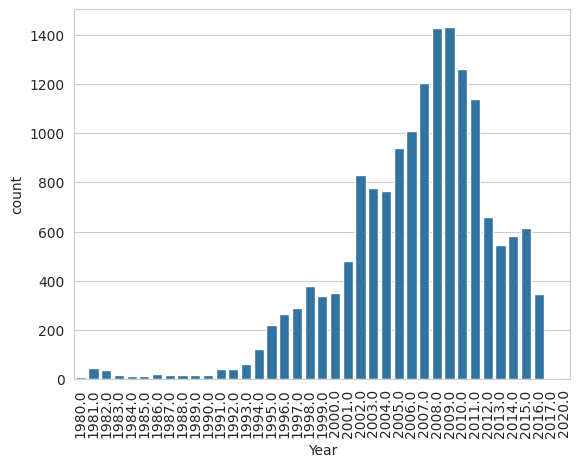

In [21]:
# 畫出直方圖用來顯示每一年發行的遊戲數目
sns.countplot(x='Year', data=data)
plt.xticks(rotation=90)
plt.show()

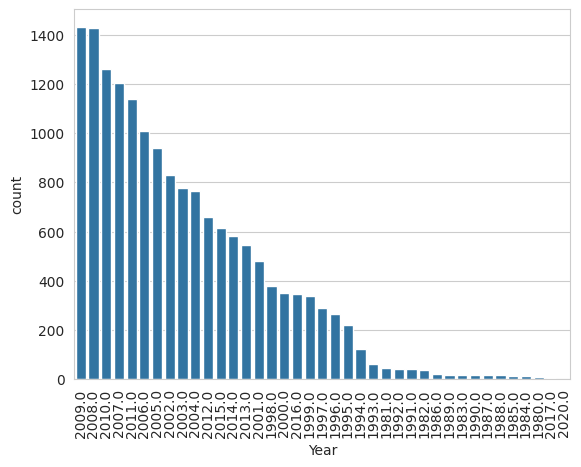

In [22]:
# 將上面的直方圖根據發行遊戲數目來排序
# 提示 countplot() 中有個參數order可以用來限制X軸的順序
# 要先產生正確的Year順序當成order的資料
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [23]:
# 根據上圖，但是只顯示前五個發行遊戲最多的年份
# plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五名發行商

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五種平台

### 加入hue

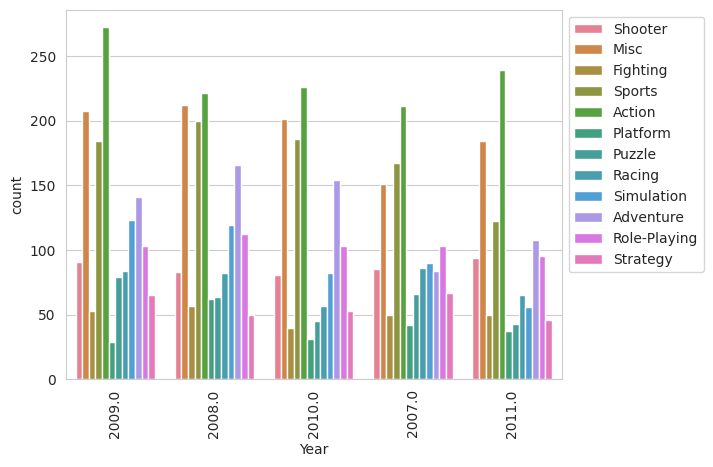

In [32]:
# 畫出直方圖顯示：
# 發行電玩數量最多的前五年的數量
# 依據電玩種類分別顯示
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index[:5], hue="Genre")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

In [ ]:
#練習題
# 畫出直方圖顯示：
# 發行電玩數目最多的前五個平台
# 依據電玩種類分別顯示發行遊戲數目

# 每年的遊戲銷售總量 barplot()

In [ ]:
# 計算每年遊戲的銷售總量


In [ ]:
# 將Year從索引重新變成欄位


In [ ]:
#限制使用Matplotlib來畫出每年遊戲的銷售總量


In [ ]:
# 將上圖依照全年銷售額來排序


In [ ]:
#練習題
#請畫出各平台的銷售總額


In [ ]:
#練習題
#請畫出各遊戲種類的北美銷售總額


In [ ]:
#練習題
#請畫出各遊戲發行商的北美加歐洲銷售總額


## 每年分別哪一種遊戲種類的發行數目最多？

In [ ]:
# 根據 年份與遊戲種類 來做群組，並計算每個群組的總數


In [ ]:
# 依據年份的不同，計算每年中遊戲種類數量最多的那個數量


In [ ]:
#將上面的結束使用transform對應回去原本的資料表


In [ ]:
#找出year_max_df中那些資料的欄位'count'值與上面找出的最大值一樣


In [ ]:
#將上面的程式整合在一起


In [ ]:
# 使用直方圖來顯示上面表格的結果


In [ ]:
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量


In [ ]:
# 練習題
# 請將上圖改成依照發行數目排序


In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個類型，哪一年的遊戲數目最多


## 每年哪一種電玩種類的銷售數量最多？

In [ ]:
# 根據 年份 跟 遊戲種類來進行群組，並計算每個群組的全球銷售總額


In [ ]:
# 根據年份分別找出該年份中那些遊戲種類的銷售總額是最大的


In [ ]:
#將上面的程式整合在一起


In [ ]:
# 使用直方圖畫出來


In [ ]:
# 練習題
# 請將上圖改成依照銷售數量排序

In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪類型的遊戲銷售量最多

## 哪一種遊戲全球的銷售總數量最高？

In [ ]:
# 根據遊戲種類進行群組，個別計算全球銷售總數


In [ ]:
# 將上面的資料畫出來


In [ ]:
#練習題
#哪一個開發商在日本地區的銷售總數最高

In [ ]:
#練習題
#哪一個平台在北美與歐洲地區的銷售總數最高

## 全球銷售數量前20大遊戲

In [ ]:
# 全球銷售數量前20大遊戲


In [ ]:
# 使用直方圖把上面的資料畫出來


In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲

In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲公司

## 比較各區域不同遊戲種類的銷售數量

In [ ]:
# 取出 遊戲總類 與 四個銷售地區 的欄位資料成為 新表格


In [ ]:
# 根據上面的表格，以遊戲種類為群組，每個群組計算四個不同地區分別的銷售總合


In [ ]:
# 使用HeatMAP畫出上面表格
# 提示 sns.heatmap()


### 問題：從上圖能看出哪些結論？

In [ ]:
#練習題
#畫出不同平台各區域的銷售數量熱圖


# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

### Pandas melt() 示範

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()

# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'],
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                var_name='Sale_Area', value_name='Sale_Price')
comp_table

In [ ]:
# 根據上面的資料
# 使用直方圖畫出
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量
# 提示 barplot(), hue 參數可以設為 Sale_Area


In [ ]:
# 練習題
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

# 前20大開發商

In [ ]:
#列出每個開發商的遊戲數目


In [ ]:
# 用直方圖畫出前20大開發商的遊戲數量


In [ ]:
# 練習題
# 用直方圖畫出前5大平台的遊戲數量

# 各遊戲開發商的全球銷售總數量

In [ ]:
#列出每個開發商的全球銷售總數量


In [ ]:
# 根據上面資料畫出
# 各遊戲開發商的全球銷售總數量


### 問題：根據上面兩張圖比較各遊戲廠商在遊戲數量與銷售的排名有何不同？

In [ ]:
#練習題
#畫出全球銷售遊戲數量前10大的遊戲平台

# 每年遊戲數目最多的開發商

In [ ]:
# 計算每年分別是那些開發商的遊戲數目最多


In [ ]:
# 使用直方圖畫出上面表格資料


# 各區域遊戲的銷售總量

In [ ]:
# 計算四個不同區域的遊戲銷售總量


In [ ]:
# 使用直方圖來畫出各區域遊戲的銷售總量


In [ ]:
# 使用圓餅圖來畫出各區域遊戲的銷售總量
# 提示： plt.pie()
